# Group 35 Python Code

## Data Collection

### Extracting PDF content from Minutes

In [1]:
#Necessary imports
import PyPDF2
import requests
import numpy as np, seaborn as sns, pandas as pd
import nltk, nltk.sentiment, sklearn
import collections
%matplotlib inline

In [114]:
#convert list to pd.series

#Preprocessing - tokenize and lower case pdf-strings
tokenizer = nltk.tokenize.TweetTokenizer()
def preprocessing(string):
    string = string.lower()
    string = tokenizer.tokenize(string)
    return string

#Apply positive/negative sets on pdf-string
#tok_doc1 = doc1_str.apply(preprocessing)

def count_dictionary(document_elem, dictionary):
    lst = []
    for word in document_elem:
        if (word in dictionary):
            lst.append(word)
    return len(lst)

In [115]:
#PDF extractor script. Creates a list separated per page.
def pdf_extractor(path):
    pdf_file = open(path, 'rb')
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    number_of_pages = read_pdf.getNumPages()
    c = collections.Counter(range(number_of_pages))
    res1 = []
    for i in range(len(c)):
        page = read_pdf.getPage(i)
        page_content = page.extractText()
        res1.append(page_content)
    return res1

### Creating Sentiment Variable

In [116]:
path_positive = 'https://raw.githubusercontent.com/MatPiq/SDS-Group-35/master/Exam_Project/positive.csv'
path_negative = 'https://raw.githubusercontent.com/MatPiq/SDS-Group-35/master/Exam_Project/negative.csv'
positive_cb = pd.read_csv(path_positive, sep=';', header=None)
negative_cb = pd.read_csv(path_negative, sep=';', header=None)
positive_cb = set(positive_cb[0])
negative_cb = set(negative_cb[0])


In [117]:
import os

#Sebastian file path
basedir = '/Users/matias/Documents/SDS-Group-35/Exam_Project/Minutes_PDF'

def sentiment_analysis(pos, neg, file_path):
    pos_words = []
    neg_words = []
    average_tone = []
    i = 0
    error = []
    
    for fn in os.listdir(file_path):
        try:
            print('Now treating file: ' + fn + '\nIterate: ' + str(i))
            doc = pdf_extractor(file_path + '/' + fn)
            doc = pd.Series([''.join(doc)])
            doc = doc.apply(preprocessing)

            pos_words.append(int(count_dictionary(doc[0], pos)))
            neg_words.append(int(count_dictionary(doc[0], neg)))
            average_tone.append((pos_words[i]-neg_words[i])/len(doc[0]))
            error.append(False)  
            
            i += 1
        
        except KeyError:
            error.append(True)
            pos_words.append(np.NaN)
            neg_words.append(np.NaN)
            average_tone.append(np.NaN)
            
            i += 1
            
        #date = re.findall(r'\d+', fn)
    df = pd.DataFrame(list(zip(pos_words, neg_words, average_tone, error)))
    return df

sent_df = sentiment_analysis(positive_cb, negative_cb, basedir)


Now treating file: ppp110419e.pdf
Iterate: 0
Now treating file: ppp121217e.pdf
Iterate: 1
Now treating file: ppp010917e.pdf
Iterate: 2
Now treating file: ppp101025e.pdf
Iterate: 3


Now treating file: ppp020318e.pdf
Iterate: 4
Now treating file: ppp011015e.pdf
Iterate: 5
Now treating file: ppp171219e.pdf
Iterate: 6


Now treating file: ppp120703e.pdf
Iterate: 7
Now treating file: ppp000203e.pdf
Iterate: 8
Now treating file: ppp090210e.pdf
Iterate: 9


Now treating file: ppp160222e.pdf
Iterate: 10
Now treating file: ppp070906e.pdf
Iterate: 11


Now treating file: ppp130918e.pdf
Iterate: 12
Now treating file: ppp070619e.pdf
Iterate: 13


Now treating file: ppp060619e.pdf
Iterate: 14


Now treating file: ppp170214e.pdf
Iterate: 15
Now treating file: ppp090420e.pdf
Iterate: 16


Now treating file: ppp030206e.pdf
Iterate: 17


Now treating file: ppp021114e.pdf
Iterate: 18
Now treating file: ppp180702e.pdf
Iterate: 19


Now treating file: ppp061025e.pdf
Iterate: 20


Now treating file: ppp190702e.pdf
Iterate: 21
Now treating file: ppp020704e.pdf
Iterate: 22
Now treating file: ppp051201e.pdf
Iterate: 23


Now treating file: ppp020207e.pdf
Iterate: 24
Now treating file: ppp010326e.pdf
Iterate: 25
Now treating file: ppp071029e.pdf
Iterate: 26


Now treating file: ppp131216e.pdf
Iterate: 27
Now treating file: ppp100224e.pdf
Iterate: 28
Now treating file: ppp101214e.pdf
Iterate: 29
Now treating file: ppp100901e.pdf
Iterate: 30
Now treating file: ppp021016e.pdf
Iterate: 31
Now treating file: ppp170906e.pdf
Iterate: 32


Now treating file: ppp160906e.pdf
Iterate: 33
Now treating file: ppp010823e.pdf
Iterate: 34
Now treating file: ppp030703e.pdf
Iterate: 35


Now treating file: ppp070214e.pdf
Iterate: 36


Now treating file: ppp140702e.pdf
Iterate: 37
Now treating file: ppp011204e.pdf
Iterate: 38
Now treating file: ppp050620e.pdf
Iterate: 39


Now treating file: ppp000706e.pdf
Iterate: 40
Now treating file: ppp010614e.pdf
Iterate: 41
Now treating file: ppp061214e.pdf
Iterate: 42


Now treating file: ppp171025e.pdf
Iterate: 43
Now treating file: ppp080702e.pdf
Iterate: 44


Now treating file: ppp110920e.pdf
Iterate: 45
Now treating file: ppp060829e.pdf
Iterate: 46


Now treating file: ppp120905e.pdf
Iterate: 47
Now treating file: ppp080903e.pdf
Iterate: 48


Now treating file: ppp111219e.pdf
Iterate: 49
Now treating file: ppp150715e.pdf
Iterate: 50
Now treating file: ppp120417e.pdf
Iterate: 51
Now treating file: ppp010530e.pdf
Iterate: 52
Now treating file: ppp071218e.pdf
Iterate: 53


Now treating file: ppp110214e.pdf
Iterate: 54
Now treating file: ppp091021e.pdf
Iterate: 55
Now treating file: ppp050314e.pdf
Iterate: 56


Now treating file: ppp001024e.pdf
Iterate: 57
Now treating file: ppp180905e.pdf
Iterate: 58


Now treating file: ppp190212e.pdf
Iterate: 59
Now treating file: ppp160504e.pdf
Iterate: 60
Now treating file: ppp020605e.pdf
Iterate: 61
Now treating file: ppp040205e.pdf
Iterate: 62


Now treating file: ppp121024e.pdf
Iterate: 63
Now treating file: ppp081022e.pdf
Iterate: 64


Now treating file: ppp160705e.pdf
Iterate: 65
Now treating file: ppp041013e.pdf
Iterate: 66
Now treating file: ppp060308e.pdf
Iterate: 67
Now treating file: ppp100503e.pdf
Iterate: 68
Now treating file: ppp140917e.pdf
Iterate: 69
Now treating file: ppp030424e.pdf
Iterate: 70


Now treating file: ppp040819e.pdf
Iterate: 71
Now treating file: ppp161026e.pdf
Iterate: 72
Now treating file: ppp090701e.pdf
Iterate: 73
Now treating file: ppp041208e.pdf
Iterate: 74
Now treating file: ppp151214e.pdf
Iterate: 75
Now treating file: ppp130212e.pdf
Iterate: 76
Now treating file: ppp091215e.pdf
Iterate: 77
Now treating file: ppp100630e.pdf
Iterate: 78
Now treating file: ppp050823e.pdf
Iterate: 79


Now treating file: ppp141111e.pdf
Iterate: 80
Now treating file: ppp040527e.pdf
Iterate: 81
Now treating file: ppp090916e.pdf
Iterate: 82
Now treating file: ppp081203e.pdf
Iterate: 83


Now treating file: ppp000816e.pdf
Iterate: 84
Now treating file: ppp151110e.pdf
Iterate: 85


Now treating file: ppp000504e.pdf
Iterate: 86
Now treating file: ppp070503e.pdf
Iterate: 87


Now treating file: ppp141215e.pdf
Iterate: 88
Now treating file: ppp040623e.pdf
Iterate: 89
Now treating file: ppp010705e.pdf
Iterate: 90
Now treating file: ppp020425e.pdf
Iterate: 91


Now treating file: ppp150916e.pdf
Iterate: 92
Now treating file: ppp070329e.pdf
Iterate: 93


Now treating file: ppp060427e.pdf
Iterate: 94


Now treating file: ppp000322e.pdf
Iterate: 95
Now treating file: ppp140408e.pdf
Iterate: 96


Now treating file: ppp031015e.pdf
Iterate: 97


Now treating file: ppp030604e.pdf
Iterate: 98


Now treating file: ppp180213e.pdf
Iterate: 99
Now treating file: ppp131106e.pdf
Iterate: 100
Now treating file: ppp190424e.pdf
Iterate: 101
Now treating file: ppp150511e.pdf
Iterate: 102
Now treating file: ppp080212e.pdf
Iterate: 103


Now treating file: ppp010201e.pdf
Iterate: 104
Now treating file: ppp040331e.pdf
Iterate: 105


Now treating file: ppp051019e.pdf
Iterate: 106


Now treating file: ppp170426e.pdf
Iterate: 107
Now treating file: ppp181219e.pdf
Iterate: 108
Now treating file: ppp150225e.pdf
Iterate: 109
Now treating file: ppp060119e.pdf
Iterate: 110


Now treating file: ppp080422e.pdf
Iterate: 111


Now treating file: ppp001220e.pdf
Iterate: 112
Now treating file: ppp081008e.pdf
Iterate: 113


Now treating file: ppp110704e.pdf
Iterate: 114
Now treating file: ppp170703e.pdf
Iterate: 115
Now treating file: ppp030814e.pdf
Iterate: 116


Now treating file: ppp020815e.pdf
Iterate: 117
Now treating file: ppp040428e.pdf
Iterate: 118


Now treating file: ppp050428e.pdf
Iterate: 119


Now treating file: ppp031204e.pdf
Iterate: 120


Now treating file: ppp021204e.pdf
Iterate: 121
Now treating file: ppp030317e.pdf
Iterate: 122


Now treating file: ppp011108e.pdf
Iterate: 123


Now treating file: ppp010426e.pdf
Iterate: 124


Now treating file: ppp181023e.pdf
Iterate: 125
Now treating file: ppp161220e.pdf
Iterate: 126
Now treating file: ppp140212e.pdf
Iterate: 127
Now treating file: ppp050127e.pdf
Iterate: 128
Now treating file: ppp111026e.pdf
Iterate: 129
Now treating file: ppp130429e.pdf
Iterate: 130
Now treating file: ppp000607e.pdf
Iterate: 131
Now treating file: ppp120215e.pdf
Iterate: 132


Now treating file: ppp180425e.pdf
Iterate: 133
Now treating file: ppp130716e.pdf
Iterate: 134


In [25]:
sent_df.columns = ['Number of positive words', 'Number of negative words', 'Average tone ratio', 'Error in processing PDF']
#print(sent_df.loc[sent_df['Number of positive words'] == True])
len(list(filter(lambda x: x > 0, sent_df['Average tone ratio'])))
sent_df.head()

,Number of positive words,Number of negative words,Average tone ratio,Error in processing PDF
0,46,82,-0.003698,False
1,86,112,-0.001763,False
2,10,37,-0.007357,False
3,103,123,-0.001093,False
4,18,32,-0.002974,False


In [32]:
import os, re, pandas as pd, ast, datetime

#Mark file path:
path = '/Users/matias/Documents/SDS-Group-35/Exam_Project/Minutes_PDF'

files = []
files2 = []

# r=root, d=directories, f = files
for r, d, f in os.walk(basedir):
    for file in f:
        if '.pdf' in file:
            files.append('20' + file[3:5] + "-" + file[5:7] + "-" + file[7:9])
            files2.append(file)

Final_list = {'Dato':files,'Filnavn':files2}

df_files = pd.DataFrame(Final_list)
df_files['date_time'] = pd.to_datetime(df_files['Dato'])
df_files['date'] = pd.to_datetime(df_files['Dato']) + pd.DateOffset(days=1)
df_files.head()

,Dato,Filnavn,date_time,date
0,2011-04-19,ppp110419e.pdf,2011-04-19,2011-04-20
1,2012-12-17,ppp121217e.pdf,2012-12-17,2012-12-18
2,2001-09-17,ppp010917e.pdf,2001-09-17,2001-09-18
3,2010-10-25,ppp101025e.pdf,2010-10-25,2010-10-26
4,2002-03-18,ppp020318e.pdf,2002-03-18,2002-03-19


In [34]:
sent_df = pd.concat([sent_df, pd.Series(df_files['date'])], axis = 1, join = 'inner')
sent_df.head()

,Number of positive words,Number of negative words,Average tone ratio,Error in processing PDF,Date time announcement,Date time announcement,date
0,46,82,-0.003698,False,2011-04-20,2011-04-20,2011-04-20
1,86,112,-0.001763,False,2012-12-18,2012-12-18,2012-12-18
2,10,37,-0.007357,False,2001-09-18,2001-09-18,2001-09-18
3,103,123,-0.001093,False,2010-10-26,2010-10-26,2010-10-26
4,18,32,-0.002974,False,2002-03-19,2002-03-19,2002-03-19


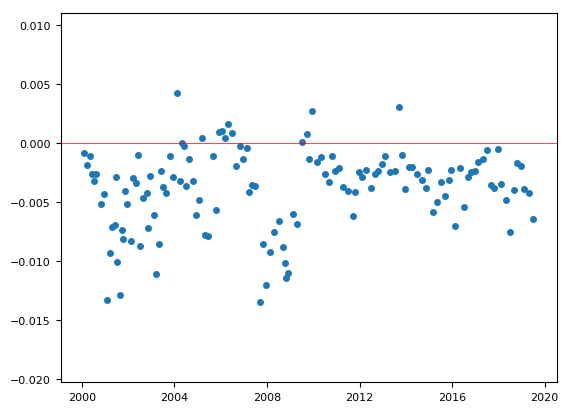

In [36]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9,4)
plt.style.use('default')
plt.rcParams.update({'font.size': 8})
plt.rcParams['lines.markersize'] = 4

x = np.array(sent_df['date'])
y = np.array(sent_df['Average tone ratio'])

# fit = np.polyfit(x, y, 4)
# fit_fn = poly1d(fit)
# print(fit_fn)

# x_new = np.linspace(x[0], x[-1], 50)
# y_new = f(x_new)

plt.scatter(x, y)#, 'o', x_new, y_new)
# plt.plot(x, y, fit)
plt.axhline(y = 0, color = 'r', linestyle = '-', linewidth = 0.5)
plt.show
plt.savefig('Sentiment_scatter.png')

### Collecting Stockmarket data

In [38]:
path_omx = 'https://raw.githubusercontent.com/MatPiq/SDS-Group-35/master/Exam_Project/historic_data/omx30.csv'
cols = ['date', 'closing value']
omx = pd.read_csv(path_omx, sep=';', names = cols)

In [51]:
#opening value column
omx['opening value'] = omx['closing value'].shift(-1)
omx['date'] = pd.to_datetime(omx['date'])


#Difference between opening and closing value
omx['dif abs'] = omx['opening value'] - omx['closing value']
omx['dif frac'] = (omx['opening value']-omx['closing value']) / omx['closing value']
omx = omx.iloc[::-1]

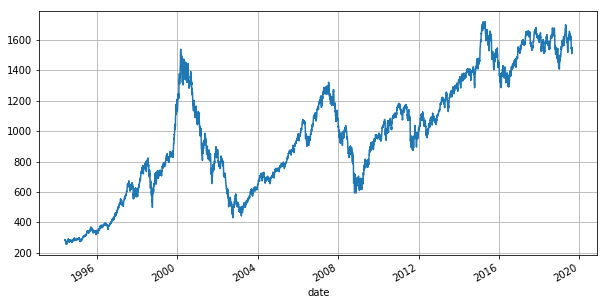

In [67]:
omx.drop(omx.loc[omx['closing value']==0].index, inplace=True)
omx.plot('date', 'closing value', grid = True, legend = False, figsize=(10, 5))
plt.savefig('omx.png')

### Collecting Repo data

In [53]:

#import repo
path_repo = 'https://raw.githubusercontent.com/MatPiq/SDS-Group-35/master/Exam_Project/historic_data/reporate.csv'
cols = ['date', 'repoann', 'repoeff']
repo = pd.read_csv(path_repo, sep=';', error_bad_lines=False, names = cols)
repo['date'] = pd.to_datetime(repo['date'])

In [54]:
#change in repo column
repo['repo_ch'] = repo['repoann']-repo['repoeff']

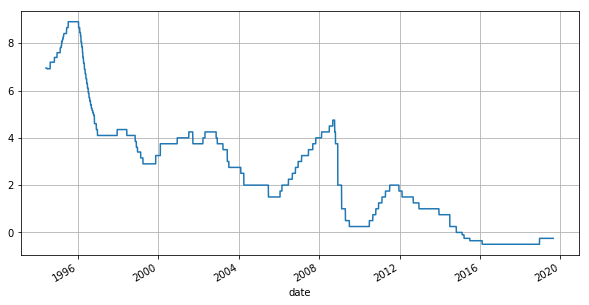

In [55]:
repo.plot('date', 'repoann', grid = True, legend = False, figsize=(10, 5))
plt.savefig('repo.png')

### Merging complete dataframe

In [56]:
#Necesary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
#Merge repo and omx
repo_omx = pd.merge(repo, omx, on = 'date', how = 'inner')


In [58]:
#Inspect and drop NaN
nan_rows = repo_omx[repo_omx.isnull().T.any().T]
repo_omx.dropna()
repo_omx.head()

,date,repoann,repoeff,repo_ch,closing value,opening value,dif abs,dif frac
0,1994-06-01,6.95,6.95,0.0,283.35,282.32,-1.03,-0.003635
1,1994-06-02,6.95,6.95,0.0,282.32,284.12,1.80,0.006376
2,1994-06-03,6.95,6.95,0.0,284.12,286.71,2.59,0.009116
3,1994-06-06,6.95,6.95,0.0,286.71,282.07,-4.64,-0.016184
4,1994-06-07,6.95,6.95,0.0,282.07,283.50,1.43,0.005070


In [63]:
#merge repo_omx with sentiment analysis
complete_df = pd.merge(repo_omx, sent_df, on = 'date', how = 'inner')
complete_df.head()

,date,repoann,repoeff,repo_ch,closing value,opening value,dif abs,dif frac,Number of positive words,Number of negative words,Average tone ratio,Error in processing PDF,Date time announcement,Date time announcement
0,2000-02-04,3.75,3.25,0.5,1329.30,1349.28,19.98,0.015030,30,35,-0.000822,False,2000-02-04,2000-02-04
1,2000-03-23,3.75,3.75,0.0,1467.11,1478.75,11.64,0.007934,11,19,-0.001847,False,2000-03-23,2000-03-23
2,2000-05-05,3.75,3.75,0.0,1455.40,1444.37,-11.03,-0.007579,20,25,-0.001100,False,2000-05-05,2000-05-05
3,2000-06-08,3.75,3.75,0.0,1447.91,1439.05,-8.86,-0.006119,12,21,-0.002571,False,2000-06-08,2000-06-08
4,2000-07-07,3.75,3.75,0.0,1382.78,1380.42,-2.36,-0.001707,12,28,-0.003221,False,2000-07-07,2000-07-07


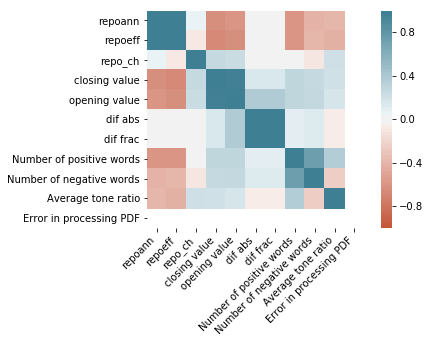

In [62]:
corr = complete_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Dataframe quality assorance and validation

## Sentiment analysis

### Model validation

## Machine learning Model

In [104]:
import pandas as pd, numpy as np, sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [105]:
# slicing the data

X = complete_df.loc[ : , ['Average tone ratio', 'repoann']] # explanatory variables

y = complete_df.loc[ : , ['dif frac']] # value to be preicted


In [106]:
# Linear regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0) #split into training and test, random state to get the same output.

pipe_lr = make_pipeline(PolynomialFeatures(include_bias = False),  #including/excluding the bias depends on our choice
                        StandardScaler())
                        #LinearRegression())

test_mse = []
train_mse = []
parameters = []
degrees = range(3)

for p in degrees:
    X_train_p = pipe_lr.fit_transform(X_train, y_train) # polynomial expansion and transformation of the data
    #X_test_p = pipe_lr.transform(X_test) # transform takes the test data and rescles it
    reg = LinearRegression().fit(X_train_p, y_train) 
    train_mse += [mse(reg.predict(X_train_p),y_train)] 
    test_mse += [mse(reg.predict(X_test_p),y_test)]     
    parameters.append(reg.coef_)
    
print(parameters)

[array([[ 0.00173644, -0.07770619,  0.01226166,  0.01253072,  0.08419986]]), array([[ 0.00173644, -0.07770619,  0.01226166,  0.01253072,  0.08419986]]), array([[ 0.00173644, -0.07770619,  0.01226166,  0.01253072,  0.08419986]])]


In [107]:
# create and split development set into validation and training

# splitting into development (2/3) and test data (1/3)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=1/3, random_state=1)

# splitting development into train (1/3) and validation (1/3), so divide by half!
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=1/2, random_state=1)

In [108]:
# Lasso model: we remove the bias, i.e. beta_0 and we estimate a parameter that improves the prediction
pipe_lr = make_pipeline(PolynomialFeatures(include_bias = False),  #including/excluding the bias depends on our choice
                        StandardScaler(),
                        LinearRegression())

perform = []
lambdas = np.logspace(-4, 4, 20)
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(include_bias=False), #multiple pipelines
                               StandardScaler(),
                               Lasso(alpha=lambda_, random_state=1))
    pipe_lasso.fit(X_train, y_train) # fit on training data
    y_pred = pipe_lasso.predict(X_val) # predict performance on validation set
    perform.append(mse(y_pred, y_val)) # saved as a series of lambdas
    
hyperparam_perform = pd.Series(perform,index=lambdas)
hyperparam_perform.nsmallest(1) # select the smallest hyperparameter

optimal = hyperparam_perform.nsmallest(1)    
print('Optimal alpha:', optimal.index[0])
print('Validation MSE: %.3f' % optimal.values[0])

# insert optimal  lambda in new model

pipe_lasso = make_pipeline(PolynomialFeatures(include_bias=False), 
                           StandardScaler(),
                           Lasso(alpha=optimal.index[0])) # new value..., alpha is lambda!
# fit new model on all development data, fit = estimate!
pipe_lasso.fit(X_dev,y_dev)
pipe_lr.fit(X_dev,y_dev)

# compare model performance on test data
print('Lasso', round(mse(pipe_lasso.predict(X_test),y_test), 3)) # smaller mse, better performance than linear model
print('LinReg', round(mse(pipe_lr.predict(X_test),y_test), 3))

Optimal alpha: 0.0018329807108324356
Validation MSE: 0.000
Lasso 0.044
LinReg 0.045


In [109]:
# ELASTIC NET
# more than one hyperparameters (L1, L2, n of features for polynoimial expansion (also chosen, can be optimized))
# grid search = search in multiple dimension.

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

pipe_el = make_pipeline(PolynomialFeatures(include_bias=False), # same as before
                        StandardScaler(),
                        ElasticNet())
gs = GridSearchCV(estimator=pipe_el, 
                  param_grid={'elasticnet__alpha':np.logspace(-4,4,10)*2, # two-dimesional grid 10*10 = 100 combinations
                              'elasticnet__l1_ratio':np.linspace(0,1,10)},  # how much the regularization of the two parameters 
                                                                            # should be
                  scoring='neg_mean_squared_error', # - MSE, minimizer!
                  n_jobs=4, # parallelize :) make computation faster
                  iid=False, # was giving a warning
                  cv=10)

model = gs.fit(X_train, y_train)
#for name, model in models.items():
score = mse(model.predict(X_test),y_test) # finally using the test data.
#print(name, round(score, 2))
print(score)
print('CV params:', gs.best_params_) # net outperformed the lassob

0.04451022719461443
CV params: {'elasticnet__alpha': 0.011989685006378818, 'elasticnet__l1_ratio': 0.4444444444444444}


In [113]:
# other evaluation method
# CROSS VALIDATION

# instead of using on epart of the data, we use all the data, rotating validation and training sets
# 10% testing, 90% training. cross-validation changes the 10% share. 

# leave one out corss validation
# take each obs, all other data used to make a model and that one used to test. most robust approach.

# K-fold method: data divided into k bins, k-1 used to train the (entire) data.

# K as large as possible (10 bins usually). this does not cause leakage because it is not the same model over and over.

from sklearn.model_selection import KFold
kfolds = KFold(n_splits=5) # number of bins
folds = list(kfolds.split(X_dev, y_dev))
# outer loop: lambdas, for each of the lambda
mseCV = []
for lambda_ in lambdas:    
    # inner loop: folds for each of the splits, we want to make the model
    mseCV_ = []    
    for train_idx, val_idx in folds:        
        # train model and compute MSE on test fold
        pipe_lassoCV = make_pipeline(PolynomialFeatures(degree=3, include_bias=True),
                                     StandardScaler(),
                                     Lasso(alpha=lambda_, random_state=1))            
        X_train, y_train = X_dev[train_idx], y_dev[train_idx] 
        X_val, y_val = X_dev[val_idx], y_dev[val_idx] 
        pipe_lassoCV.fit(X_train, y_train)     # fit the model on train data    
        mseCV_.append(mse(pipe_lassoCV.predict(X_val), y_val))    # append on validation sample and store result
        
    # store result    
    mseCV.append(mseCV_) # list of lists, becomes a dataframe next
    
# convert to DataFrame
lambdaCV = pd.DataFrame(mseCV, index=lambdas)

KeyError: '[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41\n 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65\n 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88] not in index'

### Model validation

In [ ]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = \
    validation_curve(estimator=pipe_lasso,
                     X=X_train,
                     y=y_train,
                     param_name='lasso__alpha',
                     param_range=lambdas,
                     scoring='neg_mean_squared_error',                 
                     cv=3)

mse_score = pd.DataFrame({'Train':-train_scores.mean(axis=1),
                          'Validation':-test_scores.mean(axis=1),
                          'lambda':lambdas})\
              .set_index('lambda')   
print(mse_score.Validation.nsmallest(1))

mse_score.plot(logx=True, logy=True) # optimal hyperparameters

In [ ]:
# Measures for classification accuracy

# accuracy = true/(true + false)

from sklearn.metrics import precision_score, recall_score, f1_score

# recall = share of correct answers
# precision = condition on own predictions (could be 100% even though the share of correct predictions is small)
# high recall = low false positive rate

# nested cross-validation 
# test the model 5 times (fig.), in the inner we make the validation to get optimal hyperparameters